# Overview

Decision trees are supervised learning models used for problems involving classification and regression. Tree models present a high flexibility that comes at a price: on one hand, trees are able to capture complex non-linear relationships; on the other hand, they are prone to memorizing the noise present in a dataset. By aggregating the predictions of trees that are trained differently, ensemble methods take advantage of the flexibility of trees while reducing their tendency to memorize noise. Ensemble methods are used across a variety of fields and have a proven track record of winning many machine learning competitions. We'll explore how to use Python to train decision trees and tree-based models with the user-friendly scikit-learn machine learning library. we'll understand the advantages and shortcomings of trees and demonstrate how ensembling can alleviate these shortcomings, all while practicing on real-world datasets. Finally, We'll also understand how to tune the most influential hyperparameters in order to get the most out of your models.

- **Chap 1**: Classication And Regression Tree (CART)
- **Chap 2**: The Bias-Variance Tradeoff
- **Chap 3**: Bagging and Random Forests
- **Chap 4**: BoostingChap 5: Model Tuning


# Libraries

In [119]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

from sklearn.tree import (DecisionTreeClassifier, 
                          DecisionTreeRegressor)
from sklearn.model_selection import (train_test_split, 
                                     cross_val_score)
from sklearn.metrics import (accuracy_score, 
                             mean_squared_error as MSE, 
                             roc_auc_score)
from sklearn.linear_model import (LogisticRegression, 
                                  LinearRegression)
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import (VotingClassifier,
                              BaggingClassifier, 
                              RandomForestRegressor, 
                              AdaBoostClassifier)

import warnings
warnings.filterwarnings("ignore", message="lbfgs failed to converge")
warnings.filterwarnings("ignore", message="A column-vector y was passed")


sns.set()

# Classification and Regression Trees

Classification and Regression Trees (CART) are a set of supervised learning models used for problems involving classification and regression. In this chapter, we'll be exploring the CART algorithm.



## Decision tree for classification

> ### Classication-tree
- Sequence of if-else questions about individual features.
- **Objective**: infer class labels.
- Able to capture non-linear relationships between features and labels.
- Don't require feature scaling (ex: Standardization, ..)

> ### Breast Cancer Dataset in 2D

In [2]:
wbc = pd.read_csv("datasets/wbc.csv")
wbc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


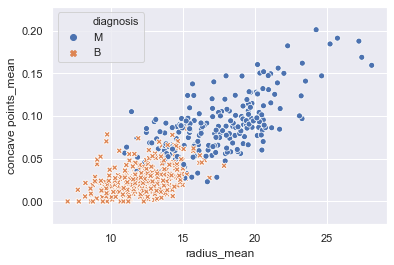

In [3]:
_ = sns.scatterplot(data=wbc, x="radius_mean", y="concave points_mean", hue="diagnosis", style="diagnosis")
plt.show()

> ### Decision-tree Diagram
![image.png](datasets/decision-tree-diagram.png)

> ### Decision Regions
- **Decision region**: region in the feature space where all instances are assigned to one class label.
- **Decision Boundary**: surface separating different decision regions.
![image.png](datasets/decision-region.png)

> ### Decision Regions: CART vs. Linear Model
![image.png](datasets/CART-vs-linear-model.png)

### Train the first classification tree

We'll work with the [**Wisconsin Breast Cancer Dataset**](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) from the UCI machine learning repository. We'll predict whether a tumor is malignant or benign based on two features: the mean radius of the tumor (`radius_mean`) and its mean number of concave points (`concave points_mean`).

In [4]:
X_wbc = wbc[["radius_mean", "concave points_mean"]]
y_wbc = wbc.diagnosis
y_wbc = y_wbc.map({'B':0, 'M':1})

X_train_wbc, X_test_wbc, y_train_wbc, y_test_wbc = train_test_split(X_wbc, y_wbc, 
                                                                    test_size=.2, random_state=1, 
                                                                    stratify=y_wbc)

The dataset is already loaded in the workspace and is split into 80% train and 20% test. The feature matrices are assigned to `X_train_wbc` and `X_test_wbc`, while the arrays of labels are assigned to `y_train_wbc` and `y_test_wbc` where class 1 corresponds to a malignant tumor and class 0 corresponds to a benign tumor. To obtain reproducible results, we'll also defined a variable called `SEED_wbc` which is set to 1.

In [5]:
SEED_wbc = 1

In [6]:
# Instantiate a DecisionTreeClassifier 'dt_wbc' with a maximum depth of 6
dt_wbc = DecisionTreeClassifier(max_depth=6, random_state=SEED_wbc)

# Fit dt to the training set
dt_wbc.fit(X_train_wbc, y_train_wbc)

# Predict test set labels
y_pred_wbc = dt_wbc.predict(X_test_wbc)
y_pred_wbc[0:5]

array([0, 0, 0, 1, 0], dtype=int64)

### Evaluate the classification tree

Now that we've fit the first classification tree, it's time to evaluate its performance on the test set. we'll do so using the accuracy metric which corresponds to the fraction of correct predictions made on the test set.

In [7]:
# Compute test set accuracy  
acc_wbc = accuracy_score(y_test_wbc, y_pred_wbc)
print("Test set accuracy: {:.2f}".format(acc_wbc))

Test set accuracy: 0.89


Using only two features, the tree was able to achieve an accuracy of 89%!

### Logistic regression vs classification tree

A classification tree divides the feature space into rectangular regions. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.

In [8]:
def plot_labeled_decision_regions(X,y, models):    
    '''
    Function producing a scatter plot of the instances contained 
    in the 2D dataset (X,y) along with the decision 
    regions of two trained classification models contained in the
    list 'models'.
            
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features 
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers 
    
    '''
    if len(models) != 2:
        raise Exception('''
        Models should be a list containing only two trained classifiers.
        ''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''
        X has to be a pandas DataFrame with two numerical features.
        ''')
    if not isinstance(y, pd.Series):
        raise Exception('''
        y has to be a pandas Series corresponding to the labels.
        ''')
    fig, ax = plt.subplots(1, 2, figsize=(6.0,2.7), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values,y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
        ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
        ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
    plt.tight_layout()
    plt.show()

`plot_labeled_decision_regions()` that can be used to plot the decision regions of a list containing two trained classifiers.

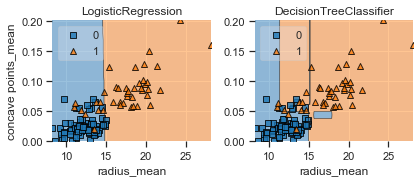

In [9]:
# Instatiate logreg_wbc
logreg_wbc = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg_wbc.fit(X_train_wbc, y_train_wbc)

# Define a list called clfs containing the two classifiers logreg and dt
clfs_wbc = [logreg_wbc, dt_wbc]

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test_wbc, y_test_wbc, clfs_wbc)

> Note: decision boundary produced by logistic regression is linear while the boundaries produced by the classification tree divide the feature space into rectangular regions.

## Classification tree Learning

> ### Building Blocks of a Decision-Tree
- **Decision-Tree**: data structure consisting of a hierarchy of nodes.
- **Node**: question or prediction.
  - Three kinds of nodes:
    - **Root**: no parent node, question giving rise to two children nodes.
    - **Internal node**: one parent node, question giving rise to two children nodes.
    - **Leaf**: one parent node, no children nodes --> prediction.

> ### Prediction
![image.png](datasets/decision-tree-bb.png)


> ### Information Gain (IG)
$$
IG(\underbrace{f}_{feature}, \underbrace{{sp}}_{split\_point})=I(parent)-(\frac{N_{left}}{N}I(left)+\frac{N_{right}}{N}I(right))
$$
- Criteria to measure the impurity of a node I(node):
  - gini index,
  - entropy. ...

![image.png](datasets/decision-tree-ig.png)

> ### Classication-Tree Learning
- Nodes are grown recursively.
- At each node, split the data based on:
  - feature $f$ and split-point $sp$ to maximize IG(node).
  - If IG(node)= 0, declare the node a leaf..

### Growing a classification tree

The growth of an unconstrained classification tree follows a few simple rules:
- The existence of a node depends on the state of its predecessors.
- The impurity of a node can be determined using different criteria such as entropy and the gini-index.
- When the information gain resulting from splitting a node is null, the node is declared as a leaf.


> Important: splitting an internal node always involves maximizing information gain!

In [10]:
dt_gini_wbc = DecisionTreeClassifier(criterion="gini", random_state=1)
dt_gini_wbc.fit(X_train_wbc, y_train_wbc)
y_gini_pred_wbc = dt_gini_wbc.predict(X_test_wbc)
y_gini_pred_wbc[:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [11]:
accuracy_score(y_test_wbc, y_gini_pred_wbc)

0.9210526315789473

### Using entropy as a criterion

We'll train a classification tree on the Wisconsin Breast Cancer dataset using entropy as an information criterion. We'll do so using all the 30 features in the dataset, which is split into 80% train and 20% test.

In [12]:
wbc.shape

(569, 33)

In [13]:
X_all_wbc = wbc[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
X_train_all_wbc, X_test_all_wbc, y_train_all_wbc, y_test_all_wbc = train_test_split(
    X_all_wbc, y_wbc, test_size=.2, stratify=y_wbc, random_state=1
)

In [14]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy_wbc = DecisionTreeClassifier(criterion="entropy", max_depth=8, random_state=1)

# Fit dt_entropy to the training set
dt_entropy_wbc.fit(X_train_all_wbc, y_train_all_wbc)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

In [15]:
dt_gini_wbc = DecisionTreeClassifier(criterion="gini", max_depth=8, random_state=1)
dt_gini_wbc.fit(X_train_all_wbc, y_train_all_wbc)

DecisionTreeClassifier(max_depth=8, random_state=1)

### Entropy vs Gini index

We'll compare the test set accuracy of `dt_entropy_wbc` to the accuracy of another tree named `dt_gini_wbc`. The tree `dt_gini_wbc` was trained on the same dataset using the same parameters except for the information criterion which was set to the gini index using the keyword `'gini'`.

In [16]:
y_pred_gini_wbc = dt_gini_wbc.predict(X_test_all_wbc)
y_pred_gini_wbc[:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [17]:
y_pred_entropy_wbc = dt_entropy_wbc.predict(X_test_all_wbc)
y_pred_entropy_wbc[:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [18]:
acc_entropy_wbc = accuracy_score(y_test_all_wbc, y_pred_entropy_wbc)
acc_entropy_wbc

0.9298245614035088

In [19]:
acc_gini_wbc = accuracy_score(y_test_all_wbc, y_pred_gini_wbc)
acc_gini_wbc

0.9298245614035088

> Note: the two models achieve exactly the same accuracy. Most of the time, the gini index and entropy lead to the same results. The gini index is slightly faster to compute and is the default criterion used in the `DecisionTreeClassifier` model of scikit-learn.

## Decision tree for regression


> ### Auto-mpg Dataset


In [20]:
auto = pd.read_csv("datasets/auto.csv")
auto.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


> ### Auto-mpg with one feature


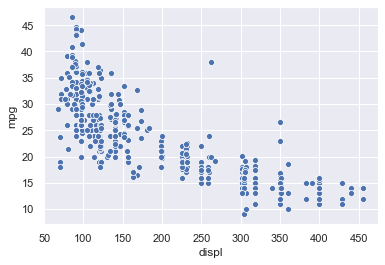

In [21]:
_ = sns.scatterplot(data=auto, x="displ", y="mpg")
plt.show()

> ### Information Criterion for Regression-Tree
$$
I(node) = \underbrace{MSE(node)}_{mean\_squared\_error} = \frac{1}{N_{node}}\sum_{i\in{node}}(y^i-\hat{y}_{node})^2
$$
$$
\underbrace{\hat{y}_{node}}_{mean\_squared\_error} = \frac{1}{N_{node}}\sum_{i\in{node}}y^i
$$

> ### Prediction
$$
\hat{y}({leaf}) =  \frac{1}{N_{leaf}}\sum_{i\in{leaf}}y^i
$$

In [22]:
X_displ_auto = auto.displ.values.reshape(-1,1)
y_mpg_auto = auto.mpg.values.reshape(-1,1)
X_train_displ_auto, X_test_displ_auto, y_train_auto, y_test_auto, = train_test_split(
    X_displ_auto, y_mpg_auto, test_size=.2, random_state=3
) 
dt_auto = DecisionTreeRegressor(max_depth=4, min_samples_leaf=.1, random_state=3)

In [23]:
dt_auto.fit(X_train_displ_auto, y_train_auto)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=3)

In [24]:
y_pred_auto = dt_auto.predict(X_test_displ_auto)
y_pred_auto[:5]

array([26.22439024, 32.98780488, 15.06470588, 32.98780488, 32.98780488])

In [25]:
mse_dt_auto = MSE(y_test_auto, y_pred_auto)
rmse_dt_auto = mse_dt_auto**(1/2)
rmse_dt_auto

5.102306888903137

### Train your first regression tree
We'll train a regression tree to predict the mpg (miles per gallon) consumption of cars in the auto-mpg dataset using all the six available features.

In [26]:
auto.shape

(392, 7)

In [27]:
auto.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [28]:
auto.origin.unique()

array(['US', 'Asia', 'Europe'], dtype=object)

In [29]:
auto2 = pd.get_dummies(auto)
auto2.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


In [30]:
X_all_auto = auto2.drop("mpg", axis=1)
X_train_all_auto, X_test_all_auto, y_train_all_auto, y_test_all_auto = train_test_split(
    X_all_auto, y_mpg_auto, test_size=.2, random_state=3)

In [31]:
# Instantiate dt
dt_all_auto = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=.13,
            random_state=3)

# Fit dt to the training set
dt_all_auto.fit(X_train_all_auto, y_train_all_auto)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

### Evaluate the regression tree

We will evaluate the test set performance of `dt_all_auto` using the Root Mean Squared Error (RMSE) metric. The RMSE of a model measures, on average, how much the model's predictions differ from the actual labels. The RMSE of a model can be obtained by computing the square root of the model's Mean Squared Error (MSE).

In [32]:
# Compute y_pred
y_pred_all_auto = dt_all_auto.predict(X_test_all_auto)

# Compute mse_dt
mse_dt_auto = MSE(y_test_all_auto, y_pred_all_auto)

# Compute rmse_dt
rmse_dt_auto = mse_dt_auto**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt_auto))

Test set RMSE of dt: 4.37


### Linear regression vs regression tree
We'll compare the test set RMSE of dt to that achieved by a linear regression model. 

In [33]:
lr_auto = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
lr_auto.fit(X_train_all_auto, y_train_all_auto)

LinearRegression(n_jobs=1)

In [35]:
# Predict test set labels 
y_pred_lr_auto = lr_auto.predict(X_test_all_auto)

# Compute mse_lr
mse_lr_auto = MSE(y_test_all_auto, y_pred_lr_auto)

# Compute rmse_lr
rmse_lr_auto = mse_lr_auto**(1/2)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr_auto))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt_auto))

Linear Regression test set RMSE: 5.10
Regression Tree test set RMSE: 4.37


# The Bias-Variance Tradeoff

The bias-variance tradeoff is one of the fundamental concepts in supervised machine learning. We'll explore how to diagnose the problems of overfitting and underfitting. We'll also be exploring the concept of ensembling where the predictions of several models are aggregated to produce predictions that are more robust.

## Generalization Error

> ### Supervised Learning - Under the Hood
- Supervised Learning:$y=f(x)$,$f$ is unknown.

> ### Goals of Supervised Learning
- Find a model  $\hat{f}$ that best approximates $f$: $\hat{f}\approx f$ 
- $\hat{f}$ can be Logistic Regression, Decision Tree, Neural Network ...
- Discard noise as much as possible.
- **End goal**: $\hat{f}$ should acheive a low predictive error on unseen datasets

> ### Difculties in Approximating $f$
- **Overtting**:$\hat{f}(x)$ fits the training set noise.
- **Undertting**: $\hat{f}$ is note flexible enough to approximate $f$.

> ### Generalization Error
- **Generalization Error of $\hat{f}$**: Does $\hat{f}$ generalize well with unseen data?
- It can be decomposed as follows:Generalization Error of $\hat{f} = {bias}^2 + variance$ + irruducible error

> ### Bias
- **Bias**: error term that tells you, on average, how much $\hat{f} \neq f$

> ### Variance
- **Variance**: tells you how much $\hat{f}$ is inconsistent over different training sets.

> ### Model Complexity
- **Model Complexity**: sets the flexibility of $\hat{f}$
- Example: Maximum tree depth, Minimum samples per leaf, ...

As the complexity of $\hat{f}$ increases, the bias term decreases while the variance term increases.

## Diagnose bias and variance problems

> Estimating the Generalization Error
- How do we estimate the generalization error of a model?
- Cannot be done directly because:
  - $f$ is unknown,
  - usually you only have one dataset,
  - noise is unpredictable.
- **Solution**:
  - split the data to training and test sets,
  - fit $\hat{f}$ to the training set,
  - evaluate the error of $\hat{f}$ on the **unseen** test set.
  - generalization error of $\hat{f} \approx$ test set error of $\hat{f}$.

> ### Better Model Evaluation with Cross-Validation
- Test set should not be touched until we are condent about $\hat{f}$'s perfomance
- Evaluating $\hat{f}$  on training set: biased estimate, $\hat{f}$ has already seen all training points.
- Solution $\longrightarrow$ Cross-Validation (CV):
  - K-Fold CV,
  - Hold-Out CV.
  
> ### K-Fold CV
$CV error = \frac{E_1+...+E_{10}}{10}$

> ### Diagnose Variance Problems
- If $\hat{f}$ suffers from **high variance**: CV error of $\hat{f}$ > training set error of $\hat{f}$.
- $\hat{f}$ is said to overfit the training set. To remedy overtting:
  - decrease model complexity,
  - for ex: decrease max depth, increase min samples per leaf, ...
  - gather more data, ..
  
> ### Diagnose Bias Problems
- if $\hat{f}$ suffers from high bias:CV error of $\hat{f} \approx$ training set error of $\hat{f}$ >> desired error. 
- $\hat{f}$ is said to underfit the training set. To remedy undertting:
  - increase model complexity
  - for ex: increase max depth, decrease min samples per leaf, ...
  - gather more relevant features

In [39]:
SEED = 123 # for reproducibility
X_train_all_auto, X_test_all_auto, y_train_all_auto, y_test_all_auto = train_test_split(X_all_auto, y_mpg_auto, 
                                                                                         test_size=.3, random_state=SEED)
dt_all_auto = DecisionTreeRegressor(max_depth=4, min_samples_leaf=.14, random_state=SEED)

In [40]:
X_train_all_auto.shape

(274, 8)

In [41]:
y_train_all_auto.shape

(274, 1)

In [42]:
X_all_auto.shape

(392, 8)

In [43]:
y_mpg_auto.shape

(392, 1)

In [44]:
MSE_CV_auto = - cross_val_score(dt_all_auto, X_train_all_auto, y_train_all_auto, 
                               cv=10, scoring="neg_mean_squared_error", n_jobs=-1)
MSE_CV_auto

array([15.54323825, 26.28799841, 26.15867241, 21.28717936, 10.79606455,
       15.89493937, 30.45480138,  8.55974761, 26.31328484, 23.76098449])

In [51]:
dt_all_auto.fit(X_train_all_auto, y_train_all_auto)
y_pred_train_auto = dt_all_auto.predict(X_train_all_auto)
y_pred_test_auto = dt_all_auto.predict(X_train_all_auto)

In [52]:
print(f"CV MSE: {MSE_CV_auto.mean():.2f}")

CV MSE: 20.51


In [53]:
print(f"RMSE: {MSE_CV_auto.mean()**(1/2):.2f}")

RMSE: 4.53


In [49]:
print(f"Train MSE: {MSE(y_train_all_auto, y_pred_train_auto):.2f}")

Train MSE: 15.30


In [54]:
print(f"Train RMSE: {MSE(y_train_all_auto, y_pred_train_auto)**(1/2):.2f}")

Train RMSE: 3.91


In [50]:
print(f"Test MSE: {MSE(y_test_all_auto, y_pred_test_auto):.2f}")

Test MSE: 20.92


### Instantiate the model

We'll diagnose the bias and variance problems of a regression tree. The regression tree we'll define will be used to predict the mpg consumption of cars from the auto dataset using all available features.

> Note:since `cross_val_score` has only the option of evaluating the negative MSEs, its output should be multiplied by negative one to obtain the MSEs. The CV RMSE can then be obtained by computing the square root of the average MSE.

A very good practice is to keep the test set untouched until you are confident about your model's performance. CV is a great technique to get an estimate of a model's performance without affecting the test set.

## Ensemble Learning

> ### Advantages of CARTs
- Simple to understand.
- Simple to interpret.
- Easy to use.
- Flexibility: ability to describe non-linear dependencies.
- Preprocessing: no need to standardize or normalize features, ...

> ### Limitations of CARTs
- **Classication**: can only produce orthogonal decision boundaries.
- Sensitive to small variations in the training set.
- **High variance**: unconstrained CARTs may overfit the training set.
- **Solution**: ensemble learning.

> ### Ensemble Learning
- Train different models on the same dataset.
- Let each model make its predictions.
- **Meta-model**: aggregates predictions of individual models.
- **Final prediction**: more robust and less prone to errors.
- **Best results**: models are skillful in different ways.

> ### Ensemble Learning: A Visual Explanation
![image.png](datasets/ensemble-learning.png)

> ### Ensemble Learning in Practice: Voting Classier
- Binary classication task.
- N classiers make predictions: $P_1, P_2, ..., P_N$ with $P_i$ = 0 or 1.
- **Meta-model prediction**: hard voting.
![image.png](datasets/hard-voting.png)

> ### Voting Classier in sklearn (Breast-Cancer dataset)


In [65]:
SEED = 1 # for reproducibility
X_train_all_wbc, X_test_all_wbc, y_train_all_wbc, y_test_all_wbc = train_test_split(X_all_wbc, y_wbc, 
                                                                                         test_size=.3, random_state=SEED)
# Instantiate individual Classifier
logreg_wbc = LogisticRegression(random_state=SEED)
knn_wbc = KNN()
dt_wbc = DecisionTreeClassifier(random_state=SEED)
classifiers = [('Logistic Regression', logreg_wbc), ('K Nearest Neighbors', knn_wbc), ("Classification Tree", dt_wbc)]

for classifier,clf in classifiers:
    clf.fit(X_train_all_wbc, y_train_all_wbc)
    y_pred_wbc = clf.predict(X_test_all_wbc)
    print(f"{classifier:s} : {accuracy_score(y_test_all_wbc, y_pred_wbc):.3f}")

Logistic Regression : 0.930
K Nearest Neighbors : 0.930
Classification Tree : 0.930


In [66]:
vc_wbc = VotingClassifier(estimators=classifiers)
vc_wbc.fit(X_train_all_wbc, y_train_all_wbc)
y_pred_wbc = vc_wbc.predict(X_test_all_wbc)
print(f"Voting Classifier: {accuracy_score(y_test_all_wbc, y_pred_wbc):.3f}")

Voting Classifier: 0.953


### Define the ensemble

We'll work with the [Indian Liver Patient Dataset](https://www.kaggle.com/jeevannagaraj/indian-liver-patient-dataset) from the UCI Machine learning repository.

We'll instantiate three classifiers to predict whether a patient suffers from a liver disease using all the features present in the dataset.

In [67]:
pd.read_csv("datasets/indian_liver_patient.csv").head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [68]:
pd.read_csv("datasets/indian_liver_patient_preprocessed.csv").head()

,Unnamed: 0,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [70]:
# Set seed for reproducibility
SEED=1

# Instantiate lr
lr_ilp = LogisticRegression(random_state=SEED)

# Instantiate knn
knn_ilp = KNN(n_neighbors=27)

# Instantiate dt
dt_ilp = DecisionTreeClassifier(min_samples_leaf=.13, random_state=SEED)

# Define the list classifiers
classifiers_ilp = [('Logistic Regression', lr_ilp), ('K Nearest Neighbours', knn_ilp), ('Classification Tree', dt_ilp)]

### Evaluate individual classifiers

In [71]:
ilp = pd.read_csv("datasets/indian_liver_patient_preprocessed.csv")
ilp.shape 

(579, 12)

In [72]:
X_ilp = ilp[['Unnamed: 0', 'Age_std', 'Total_Bilirubin_std', 'Direct_Bilirubin_std',
       'Alkaline_Phosphotase_std', 'Alamine_Aminotransferase_std',
       'Aspartate_Aminotransferase_std', 'Total_Protiens_std', 'Albumin_std',
       'Albumin_and_Globulin_Ratio_std', 'Is_male_std']]
y_ilp = ilp.Liver_disease

In [74]:
X_train_ilp, X_test_ilp, y_train_ilp, y_test_ilp = train_test_split(X_ilp, y_ilp, test_size=.3, random_state=SEED)

In [75]:
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers_ilp:    
 
    # Fit clf to the training set
    clf.fit(X_train_ilp, y_train_ilp)    
   
    # Predict y_pred
    y_pred_ilp = clf.predict(X_test_ilp)
    
    # Calculate accuracy
    accuracy_ilp = accuracy_score(y_test_ilp, y_pred_ilp) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy_ilp))

Logistic Regression : 0.764
K Nearest Neighbours : 0.724
Classification Tree : 0.730


Logistic Regression achieved the highest accuracy of 76.4%.

### Better performance with a Voting Classifier

We'll evaluate the performance of a voting classifier that takes the outputs of the models defined in the list classifiers and assigns labels by majority voting.

In [76]:
# Instantiate a VotingClassifier vc
vc_ilp = VotingClassifier(estimators=classifiers_ilp)     

# Fit vc to the training set
vc_ilp.fit(X_train_ilp, y_train_ilp)   

# Evaluate the test set predictions
y_pred_ilp = vc_ilp.predict(X_test_ilp)

# Calculate accuracy score
accuracy_ilp = accuracy_score(y_test_ilp, y_pred_ilp)
print('Voting Classifier: {:.3f}'.format(accuracy_ilp))

Voting Classifier: 0.764


# Bagging and Random Forests

Bagging is an ensemble method involving training the same algorithm many times using different subsets sampled from the training data. We'll explore how bagging can be used to create a tree ensemble. We'll also explore how the random forests algorithm can lead to further ensemble diversity through randomization at the level of each split in the trees forming the ensemble.

## Bagging


> ### Ensemble Methods
- Voting Classier
  - same training set,
  - $\neq$ algorithms.
- Bagging
  - one algorithm,
  - $\neq$ subsets of the training set.

> ### Bagging
- **Bagging**: Bootstrap Aggregation.
- Uses a technique known as the bootstrap.
- Reduces variance of individual models in the ensemble.

> ### Bootstrap
![image.png](datasets/bootstrap.png)

> ### Bagging: Training
![image.png](datasets/bagging-training.png)

> ### Bagging: Prediction
![image.png](datasets/bagging-prediction.png)

> ### Bagging: Classication & Regression
- **Classication**: Aggregates predictions by majority voting.
  - `BaggingClassifier` in scikit-learn.
- **Regression**:Aggregates predictions through averaging.
  - `BaggingRegressor` in scikit-learn.

> ### Bagging Classier in sklearn (Breast-Cancer dataset)

In [79]:
SEED = 1

In [80]:
X_train_all_wbc, X_test_all_wbc, y_train_all_wbc, y_test_all_wbc = train_test_split(X_wbc, y_wbc, 
                                                                                    stratify=y_wbc, 
                                                                                    random_state=SEED,
                                                                                    test_size=.3
                                                                                   )

In [81]:
dt_wbc = DecisionTreeClassifier(max_depth=4, min_samples_leaf=.16, random_state=SEED)
bc_wbc = BaggingClassifier(base_estimator=dt_wbc, n_estimators=300, n_jobs=-1)
bc_wbc.fit(X_train_all_wbc, y_train_all_wbc)
y_pred_wbc = bc_wbc.predict(X_test_all_wbc)
accuracy_wbc = accuracy_score(y_test_all_wbc, y_pred_wbc)
print(f"Accuracy of Bagging Classifier: {accuracy_wbc:.3f}")

Accuracy of Bagging Classifier: 0.877


### Define the bagging classifier

We'll work with the Indian Liver Patient dataset from the UCI machine learning repository. The task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. We'll do so using a Bagging Classifier.

In [82]:
# Instantiate dt
dt_ilp = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc_ilp = BaggingClassifier(base_estimator=dt_ilp, n_estimators=50, random_state=1)

### Evaluate Bagging performance

Now that We instantiated the bagging classifier, it's time to train it and evaluate its test set accuracy.

In [84]:
ilp2 = pd.read_csv("datasets/indian_liver_patient.csv")
ilp2.shape

(583, 11)

In [89]:
ilp2.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [90]:
ilp2["Gender"] = ilp2.Gender.map({"Male":1, "Female":0})

In [95]:
ilp2.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [96]:
ilp2.dropna(inplace=True)

In [97]:
ilp2.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [98]:
X_ilp2 = ilp2.drop("Dataset", axis=1)
y_ilp2 = ilp2.Dataset

In [99]:
X_train_ilp2, X_test_ilp2, y_train_ilp2, y_test_ilp2 = train_test_split(X_ilp2, y_ilp2, test_size=.2, random_state=1)

In [100]:
# Fit bc to the training set
bc_ilp.fit(X_train_ilp2, y_train_ilp2)

# Predict test set labels
y_pred_ilp = bc_ilp.predict(X_test_ilp2)

# Evaluate acc_test
acc_test_ilp = accuracy_score(y_test_ilp2, y_pred_ilp)
print('Test set accuracy of bc: {:.2f}'.format(acc_test_ilp)) 

Test set accuracy of bc: 0.71


## Out of Bag Evaluation

> ### Bagging
- some instances may be sampled several times for one model,
- other instances may not be sampled at all.


> ### Out Of Bag (OOB) instances
- On average, for each model, 63% of the training instances are sampled.
- The remaining 37% constitute the OOB instances.

> ### OOB Evaluation
![image.png](datasets/oob.png)

> ### OOB Evaluation in sklearn (Breast CancerDataset)

In [101]:
bc_wbc = BaggingClassifier(base_estimator=dt_wbc, n_estimators=300, oob_score=True, n_jobs=-1)
bc_wbc.fit(X_train_all_wbc, y_train_all_wbc)
y_pred_wbc = bc_wbc.predict(X_test_all_wbc)
y_pred_wbc[:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [102]:
test_accuracy_wbc = accuracy_score(y_test_all_wbc, y_pred_wbc)
oob_accuracy_wbc = bc_wbc.oob_score_
print(f"Test Accurary {test_accuracy_wbc:.3f}")
print(f"OOB Accuracy {oob_accuracy_wbc:.3f}")

Test Accurary 0.877
OOB Accuracy 0.910


### Prepare the ground

We'll compare the OOB accuracy to the test set accuracy of a bagging classifier trained on the Indian Liver Patient dataset.

In sklearn, you can evaluate the OOB accuracy of an ensemble classifier by setting the parameter `oob_score` to True during instantiation. After training the classifier, the OOB accuracy can be obtained by accessing the `.oob_score_` attribute from the corresponding instance.

In [103]:
# Instantiate dt
dt_ilp = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc_ilp = BaggingClassifier(base_estimator=dt_ilp, 
            n_estimators=50,
            oob_score=True,
            random_state=1)

### OOB Score vs Test Set Score

We will fit it to the training set and evaluate its test set and OOB accuracies.

In [104]:
# Fit bc to the training set 
bc_ilp.fit(X_train_ilp2, y_train_ilp2)

# Predict test set labels
y_pred_ilp = bc_ilp.predict(X_test_ilp2)

# Evaluate test set accuracy
acc_test_ilp = accuracy_score(y_test_ilp2, y_pred_ilp)

# Evaluate OOB accuracy
acc_oob_ilp = bc_ilp.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test_ilp, acc_oob_ilp))

Test set accuracy: 0.690, OOB accuracy: 0.680


The test set accuracy and the OOB accuracy of bc are both roughly equal to 70%!

## Random Forests (RF)

> ### Bagging
- **Base estimator**: Decision Tree, Logistic Regression, Neural Net, ...
- Each estimator is trained on a distinct bootstrap sample of the training set
- Estimators use all features for training and prediction

> ### Further Diversity with Random Forests
- **Base estimator**: Decision Tree
- Each estimator is trained on a different bootstrap sample having the same size as the training set
- RF introduces further randomization in the training of individual trees
- $d$ features are sampled at each node without replacement( %d%<total number of features )

> ### Random Forests: Training
![image.png](datasets/rf-training.png)

> ### Random Forests: Prediction
![image.png](datasets/rf-prediction.png)

> ### Random Forests: Classication & Regression
- **Classification**:Aggregates predictions by majority voting
  - `RandomForestClassifier` in scikit-learn
- **Regression**:Aggregates predictions through averaging 
  - `RandomForestRegressor` in scikit-learn

> ### Random Forests Regressor in sklearn (autodataset)

In [106]:
SEED

1

In [109]:
X_train_auto, X_test_auto, y_train_auto, y_test_auto = train_test_split(X_all_auto, y_mpg_auto, 
                                                                       test_size=.3, random_state=SEED)
rf_auto = RandomForestRegressor(n_estimators=400, min_samples_leaf=.12, random_state=SEED)
rf_auto.fit(X_train_auto, y_train_auto)
y_pred_auto = rf_auto.predict(X_test_auto)
rmse_test_auto = MSE(y_test_auto, y_pred_auto)**(1/2)
print(f"Test set RMSE of rf {rmse_test_auto:.3f}")

Test set RMSE of rf 3.978


> ### Feature Importance
- **Tree-based methods**: enable measuring the importance of each feature in prediction.
- In `sklearn`:
  - how much the tree nodes use a particular feature (weighted average) to reduce impurity
  - accessed using the attribute `feature_importance_`
  
> ### Feature Importance in sklearn


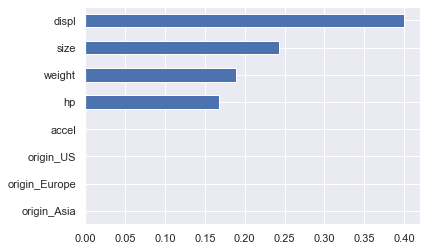

In [111]:
importances_rf_auto = pd.Series(rf_auto.feature_importances_, index=X_all_auto.columns).sort_values()
importances_rf_auto.plot(kind='barh')
plt.show()

### Train an RF regressor

We'll predict bike rental demand in the Capital Bikeshare program in Washington, D.C using historical weather data from the [Bike Sharing Demand dataset](https://www.kaggle.com/c/bike-sharing-demand) available through Kaggle. For this purpose, we will be using the random forests algorithm. As a first step, we'll define a random forests regressor and fit it to the training set.

In [112]:
bikes = pd.read_csv("datasets/bikes.csv")
bikes.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [113]:
bikes.shape

(1488, 13)

In [114]:
X_bikes = bikes.drop("cnt", axis=1)
y_bikes = bikes.cnt

In [116]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bikes, y_bikes, test_size=.2, random_state=2)
# Instantiate rf
rf_b = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf_b.fit(X_train_b, y_train_b) 

RandomForestRegressor(n_estimators=25, random_state=2)

### Evaluate the RF regressor

We'll now evaluate the test set RMSE of the random forests regressor rf

In [117]:
# Predict the test set labels
y_pred_b = rf_b.predict(X_test_b)

# Evaluate the test set RMSE
rmse_test_b = MSE(y_test_b, y_pred_b)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test_b))

Test set RMSE of rf: 54.49


### Visualizing features importances

We'll determine which features were the most predictive according to the random forests regressor rf

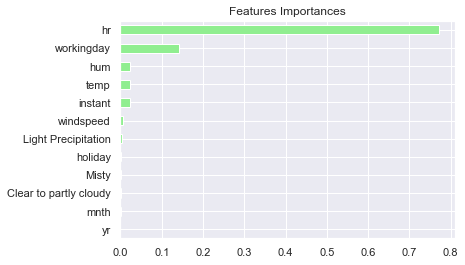

In [118]:
# Create a pd.Series of features importances
importances_b = pd.Series(data=rf_b.feature_importances_,
                        index= X_train_b.columns)

# Sort importances
importances_sorted_b = importances_b.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted_b.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

hr and workingday are the most important features according to rf. The importances of these two features add up to more than 90%!

# Boosting

Boosting refers to an ensemble method in which several models are trained sequentially with each model learning from the errors of its predecessors. We'll be exploring to the two boosting methods of AdaBoost and Gradient Boosting.

## Adaboost

> ### Boosting
- **Boosting**: Ensemble method combining several weak learners to form a strong learner.
- **Weak learner**: Model doing slightly better than random guessing.
- **Example of weak learner**: Decision stump (CART whose maximum depth is 1).

> ### Boosting
- Train an ensemble of predictors sequentially.
- Each predictor tries to correct its predecessor.
- Most popular boosting methods:
  - AdaBoost,
  - Gradient Boosting.

> ### Adaboost
- Stands for **Ad**aptive **Boost**ing.
- Each predictor pays more attention to the instances wrongly predicted by its predecessor.
- Achieved by changing the weights of training instances.
- Each predictor is assigned a coefcient $\alpha$.
- $\alpha$ depends on the predictor's training error.

> ### AdaBoost: Training
![image.png](datasets/adaboost-training.png)

> ### Learning Rate
- Learningrate:$0<η≤1$

> ### AdaBoost: Prediction
- **Classication**: Weighted majority voting.
  - In sklearn: `AdaBoostClassifier`.
- **Regression**:Weighted average.
  - In sklearn: `AdaBoostRegressor`.

> ### AdaBoost Classication in sklearn (Breast Cancerdataset)

In [120]:
SEED

1

In [123]:
dt_wbc = DecisionTreeClassifier(max_depth=SEED, random_state=SEED)
adb_clf_wbc = AdaBoostClassifier(base_estimator=dt_wbc, n_estimators=100)
adb_clf_wbc.fit(X_train_all_wbc, y_train_all_wbc)
y_pred_proba_wbc = adb_clf_wbc.predict_proba(X_test_all_wbc)[:,1]
adb_clf_rac_wbc = roc_auc_score(y_test_all_wbc, y_pred_proba_wbc)
print(f"ROC AUC score: {adb_clf_rac_wbc:.2f}")

ROC AUC score: 0.96
